In [209]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display

%matplotlib inline

In [210]:
def greeting(i, j):
    message = "Hello world: "+ str(i) + str(j)
    return message

print(greeting(1,2))

Hello world: 12


In [211]:
#i = interact(greeting, i=(0,5), j=(100,200))

In [212]:
def plot_images(images):
    f, mysubplots = plt.subplots(int(len(images)),1, figsize=(100,100))
    for i, mysubplot in enumerate(mysubplots):
        myimage = cv2.imread(images[i])
        myimage = cv2.cvtColor(myimage, cv2.COLOR_BGR2RGB)
        mysubplot.imshow(myimage)
        f.tight_layout()
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0., hspace=2)

In [213]:
#TODO: Seperate sobel transform and color transform functions
def get_s_channel_hsv(img):
    # Convert to HSV color space and separate the S channel
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.float)
    s_channel = hsv[:,:,1]
    return s_channel

def get_v_channel_hsv(img):
    # Convert to HSV color space and separate the V channel
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.float)
    v_channel = hsv[:,:,2]
    return v_channel

#TODO: Seperate sobel transform and color transform functions
def get_s_channel_hls(img):
    # Convert to HLS color space and separate the S channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    s_channel = hls[:,:,2]
    return s_channel

def get_l_channel_hls(img):
    # Convert to HLS color space and separate the l channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hls[:,:,1]
    return l_channel

def get_scaled_sobelx(s_channel):
    # Sobel x
    sobelx = cv2.Sobel(s_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    return scaled_sobel

def get_scaled_sobely(s_channel):
    # Sobel y
    sobely = cv2.Sobel(s_channel, cv2.CV_64F, 0, 1) # Take the derivative in y
    abs_sobely = np.absolute(sobely) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobely/np.max(abs_sobely))
    return scaled_sobel
    
def get_thresholded_x_gradient_binary(scaled_sobel, sx_thresh):
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    return sxbinary

def get_thresholded_y_gradient_binary(scaled_sobel, sy_thresh):
    # Threshold y gradient
    sybinary = np.zeros_like(scaled_sobel)
    sybinary[(scaled_sobel >= sy_thresh[0]) & (scaled_sobel <= sy_thresh[1])] = 1
    return sybinary

def get_combined_gradient_binary(sx_binary, sy_binary):
    binary = np.zeros_like(sx_binary)
    binary[(sx_binary ==1) & (sy_binary == 1)] = 1
    return binary

def get_color_channel_thresholded_binary(channel, thresh):
    binary = np.zeros_like(channel)
    binary[(channel > thresh[0]) & (channel <= thresh[1])] = 1
    return binary

def get_combined_color_thresholded_binary(channel1, channel2):
    binary = np.zeros_like(channel1)
    binary[(channel1 ==1) | (channel2 == 1)] = 1
    return binary

def get_overall_combined_binary(binary1, binary2):
    combined_binary = np.zeros_like(binary1)
    combined_binary[(binary1 == 1) | (binary2 == 1)] = 255
    return combined_binary
    
#def apply_color_and_gradient_threshold(img, s_thresh_hls, s_thresh_hsv, l_thresh_hls, v_thresh, sx_thresh, sy_thresh):    
#    s_channel_hls = get_s_channel_hls(img)
#    l_channel_hls = get_l_channel_hls(img)
    
#    scaled_sobel = get_scaled_sobelx(s_channel_hls)
#    sx_binary = get_thresholded_x_gradient_binary(scaled_sobel, sx_thresh)  
        
#    l_binary_hls = get_color_channel_thresholded_binary(l_channel_hls, l_thresh_hls)
        
#    overall_combined_binary = get_overall_combined_binary(sx_binary, l_binary_hls)
    
#    return overall_combined_binary

def apply_color_and_gradient_threshold(img, l_thresh_hls=(200,255), sx_thresh=(20,255)):    
    s_channel_hls = get_s_channel_hls(img)
    l_channel_hls = get_l_channel_hls(img)
    
    scaled_sobel = get_scaled_sobelx(s_channel_hls)
    sx_binary = get_thresholded_x_gradient_binary(scaled_sobel, sx_thresh)  
        
    l_binary_hls = get_color_channel_thresholded_binary(l_channel_hls, l_thresh_hls)
        
    overall_combined_binary = get_overall_combined_binary(sx_binary, l_binary_hls)
    
    return overall_combined_binary

#thresholded_combined_binary = apply_color_and_gradient_threshold(sample_undistorted_image)

#f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
#f.tight_layout()

#ax1.imshow(sample_undistorted_image)
#ax1.set_title('Original Image', fontsize=25)

#ax2.imshow(thresholded_combined_binary, cmap='gray')
#ax2.set_title('Combined', fontsize=25)

#plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [214]:
%matplotlib inline
images = glob.glob('./test_images/*.jpg')

def wrapper(s1min=0, s1max=255,s2min=0, s2max=255, lmin=200, lmax=255, vmin=0, vmax=255, sxmin=20, sxmax=255, symin=0, symax=255):
    test_image = cv2.imread(images[4])
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    #output = apply_color_and_gradient_threshold(test_image, (s1min,s1max), (s2min,s2max),(lmin,lmax), (vmin,vmax), (sxmin,sxmax), (symin,symax))
    output = apply_color_and_gradient_threshold(test_image, l_thresh_hls=(lmin,lmax), sx_thresh=(sxmin,sxmax))
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(test_image)
    ax2.imshow(output, cmap='gray')
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    



#wrapper(test_image)

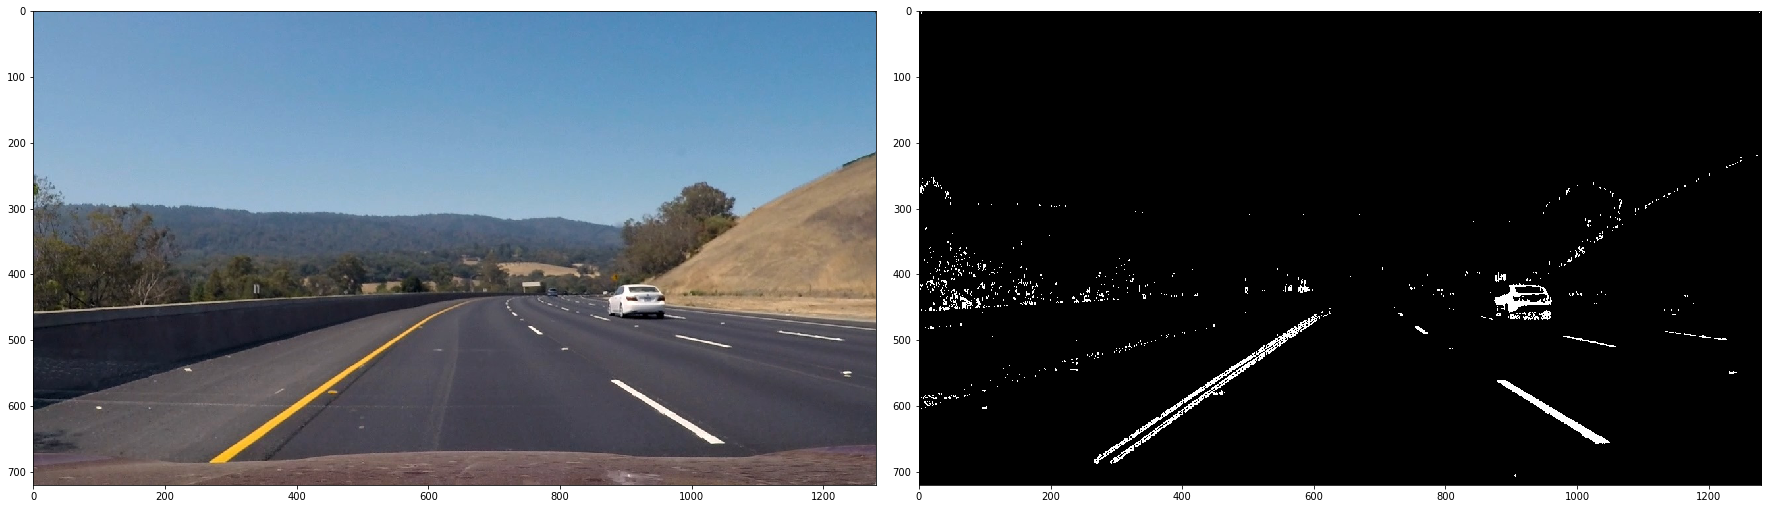

In [215]:
i = interact(wrapper, s1min=(0,255), s1max=(0,255), s2min=(0,255), s2max=(0,255),lmin=(0,255), lmax=(0,255), vmin=(0,255), vmax=(0,255), sxmin=(0,255), sxmax=(0,255), symin=(0,255), symax=(0,255))